In [1]:

import pandas as pd
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pylab as pl
from bs4 import BeautifulSoup
import requests
from urllib2 import *

from scipy import stats


%matplotlib inline

# Data/ Methods: For this assignment I used data provide by NYU CUSP gathered by 4 sensors around the Red Hook Initiative Building In Brooklyn NY.  I used 311 noise complaint data provided by NYC Open Data in the zip code 11231.  I used daily historical tempature and humidity data provided by wunderground.com.  

# In this project I examined the relationship between the four sensors readings from June 6, 2016 to July 17, 2016.  My alternative hypothesis is that there is a positive coorelation between the sound pressure readings and noise complaints as well as the humidity and heat with the particulate density readings.  

In [2]:
#import the sensor data, Since it isn't being hosted online I added it to my github so the code is repoducable
sensordata = pd.read_csv("https://raw.githubusercontent.com/KDumanski/PUI2016_kpd286/master/LuxDustNoise_summarized_4hour_0719.csv")

In [3]:
#read the data
sensordata.head(5)

,dt,sensor,lux,con,spl
0,6/21/2016 0:00,sensor_0,0.0,2834.03125,66.308479
1,6/21/2016 0:00,sensor_2,0.0,1691.99625,70.375943
2,6/21/2016 0:00,sensor_3,0.0,1686.44125,76.235738
3,6/21/2016 0:00,sensor_4,0.0,2324.65875,70.652334
4,6/21/2016 4:00,sensor_0,3213.5,2748.28875,81.467436


In [4]:
#change Dt to date time format for plotting
sensordata["dt"] = pd.to_datetime(sensordata['dt'])
# convert numeric columns to numeric
sensordata['con'] = pd.to_numeric(sensordata['con'], errors='ignore')
sensordata['lux'] = pd.to_numeric(sensordata['lux'], errors='ignore')
sensordata['spl'] = pd.to_numeric(sensordata['spl'], errors='ignore')

In [5]:

#create new dataset for each sensor to be used on plots
sensor1 = sensordata.loc[sensordata['sensor'] == 'sensor_0']#mage dt index for plotting
sensor2 = sensordata.loc[sensordata['sensor'] == 'sensor_2']
sensor3 = sensordata.loc[sensordata['sensor'] == 'sensor_3']
sensor4 = sensordata.loc[sensordata['sensor'] == 'sensor_4']

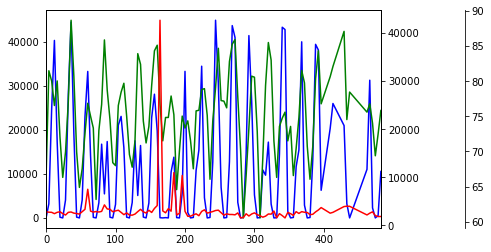

In [7]:
#Sensor 1 values plotted
fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)


sensor1.lux.plot(ax=ax, style='b-')
sensor1.con.plot(ax=ax2, style='r-', secondary_y=True)
sensor1.spl.plot(ax=ax3, style='g-')


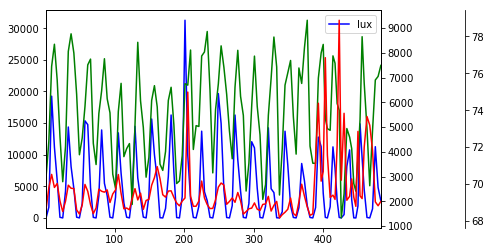

In [8]:
#Sensor 2 values plotted
fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)



sensor2.lux.plot(ax=ax, style='b-')
sensor2.con.plot(ax=ax2, style='r-', secondary_y=True)
sensor2.spl.plot(ax=ax3, style='g-')
ax.legend(loc=1)

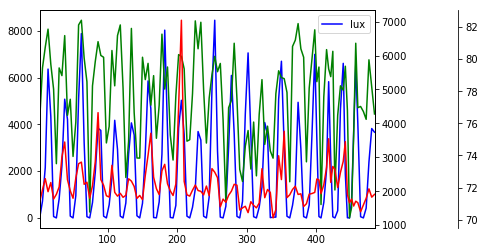

In [9]:
#Sensor 3 values plotted
fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)



sensor3.lux.plot(ax=ax, style='b-')
sensor3.con.plot(ax=ax2, style='r-', secondary_y=True)
sensor3.spl.plot(ax=ax3, style='g-')
ax.legend(loc=1)

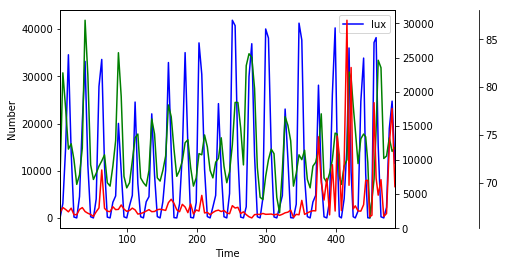

In [10]:
#Sensor 4 values plotted
fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)



sensor4.lux.plot(ax=ax, style='b-')
sensor4.con.plot(ax=ax2, style='r-', secondary_y=True)
sensor4.spl.plot(ax=ax3, style='g-')

ax.set_xlabel("Time")
ax.set_ylabel(r"Number")



ax.legend(loc=1)

In [12]:
#rename column names for clarity
sensor1 = sensor1.rename(columns={'lux': 'lux1', 'con': 'con1','spl': 'spl1'})
sensor2 = sensor2.rename(columns={'lux': 'lux2', 'con': 'con2','spl': 'spl2'})
sensor3 = sensor3.rename(columns={'lux': 'lux3', 'con': 'con3','spl': 'spl3'})
sensor4 = sensor4.rename(columns={'lux': 'lux4', 'con': 'con4','spl': 'spl4'})

In [13]:
#merge columns into same dataframe 
merged = pd.merge(sensor1, sensor2, on='dt')
merged2 = pd.merge(sensor3, sensor4, on='dt')
merged3 = pd.merge(merged, merged2, on='dt')

In [14]:
#change the date time column to date time format for plotting and analysis
sensordata["dt"] = pd.to_datetime(sensordata['dt'])
# convert numeric columns to numeric
sensordata['con'] = pd.to_numeric(sensordata['con'], errors='ignore')
sensordata['lux'] = pd.to_numeric(sensordata['lux'], errors='ignore')
sensordata['spl'] = pd.to_numeric(sensordata['spl'], errors='ignore')

#create totals column
merged3["lighttotal"] =  merged3["lux1"] + merged3["lux2"] + merged3["lux3"] + merged3["lux4"]
merged3["soundpressuretotal"] =  merged3["spl1"] + merged3["spl2"] + merged3["spl3"] + merged3["spl4"]
merged3["particledensitytotal"] =  merged3["con1"] + merged3["con2"] + merged3["con3"] + merged3["con4"]

In [15]:
merged3.head()

,dt,sensor_x_x,lux1,con1,spl1,sensor_y_x,lux2,con2,spl2,sensor_x_y,lux3,con3,spl3,sensor_y_y,lux4,con4,spl4,lighttotal,soundpressuretotal,particledensitytotal
0,2016-06-21 00:00:00,sensor_0,0.000,2834.03125,66.308479,sensor_2,0.000,1691.99625,70.375943,sensor_3,0.000,1686.44125,76.235738,sensor_4,0.000,2324.65875,70.652334,0.000,283.572494,8537.12750
1,2016-06-21 04:00:00,sensor_0,3213.500,2748.28875,81.467436,sensor_2,1703.000,2550.94500,72.334450,sensor_3,712.500,2041.33000,79.445869,sensor_4,3057.750,3041.73875,81.499422,8686.750,314.747178,10382.30250
2,2016-06-21 08:00:00,sensor_0,24532.625,2720.35125,80.020600,sensor_2,19257.500,3088.82750,76.372047,sensor_3,2152.875,2369.71750,80.738609,sensor_4,14859.000,2757.67250,77.785565,60802.000,314.916821,10936.56875
3,2016-06-21 12:00:00,sensor_0,40268.250,2443.72875,76.525876,sensor_2,11213.125,2561.64625,77.571715,sensor_3,6361.500,1985.25625,81.861684,sensor_4,34566.500,2409.32625,73.503135,92409.375,309.462410,9399.95750
4,2016-06-21 16:00:00,sensor_0,17189.750,2717.49625,80.020600,sensor_2,5939.250,2721.79125,75.635837,sensor_3,4337.125,2255.37750,79.675113,sensor_4,13819.375,2944.80375,74.061797,41285.500,309.393347,10639.46875


In [16]:
merged3 = merged3.set_index('dt')

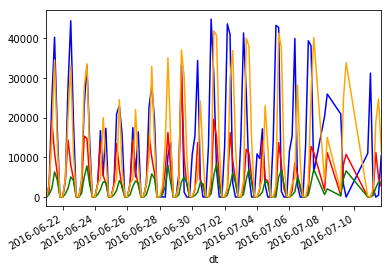

In [17]:
#Plot all Lux
merged3["lux1"].plot(label="sensor 1", style='blue')
merged3["lux2"].plot(label="sensor 2", style='red')
merged3["lux3"].plot(label="sensor 3", style='green')
merged3["lux4"].plot(label="sensor 4", style='orange')
ax.legend(loc=1)

plt.plot()
plt.show()

3 sigma threshold -52902.9
('outlier index', (array([], dtype=int64),))
('outlier date', DatetimeIndex([], dtype='datetime64[ns]', name=u'dt', freq=None))


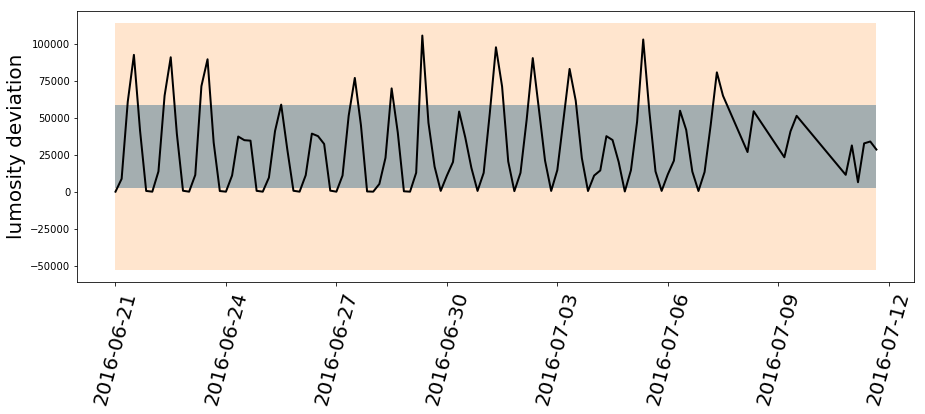

In [18]:
rng = merged3.index
mta_allsum = merged3["lighttotal"]

pl.figure(figsize=(15,5))
pl.plot(rng, mta_allsum, 'k-', lw = 2)
pl.xticks(rotation = 75, fontsize=20)
pl.ylabel("lumosity deviation", fontsize=20)  
onesig = np.std(mta_allsum)
tsthresh = np.nanmean(mta_allsum)  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(mta_allsum < tsthresh))
print ("outlier date", rng[np.where(mta_allsum < tsthresh)])
pl.fill_between(rng, np.nanmean(mta_allsum) - onesig,
                np.nanmean(mta_allsum) + onesig, alpha=0.5)
pl.fill_between(rng, np.nanmean(mta_allsum) - 3 * onesig,
                 np.nanmean(mta_allsum) + 3 * onesig, alpha = 0.2)
#pl.fill_between(weighted +threesigma(weighted , 10), weighted -threesigma(weighted

# Lumosity abnormal behavior: 7.10 & 7.11. It appears that between these days the cycle of light readings by the sensors was disrupted.  

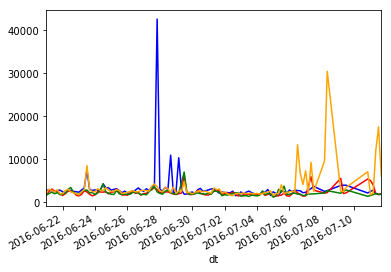

In [19]:
#plot all con
merged3["con1"].plot(label="sensor 1", style='blue')
merged3["con2"].plot(label="sensor 1", style='red')
merged3["con3"].plot(label="sensor 1", style='green')
merged3["con4"].plot(label="sensor 1", style='orange')
ax.legend(loc=1)

plt.plot()
plt.show()

3 sigma threshold -5902.7
('outlier index', (array([], dtype=int64),))
('outlier date', DatetimeIndex([], dtype='datetime64[ns]', name=u'dt', freq=None))


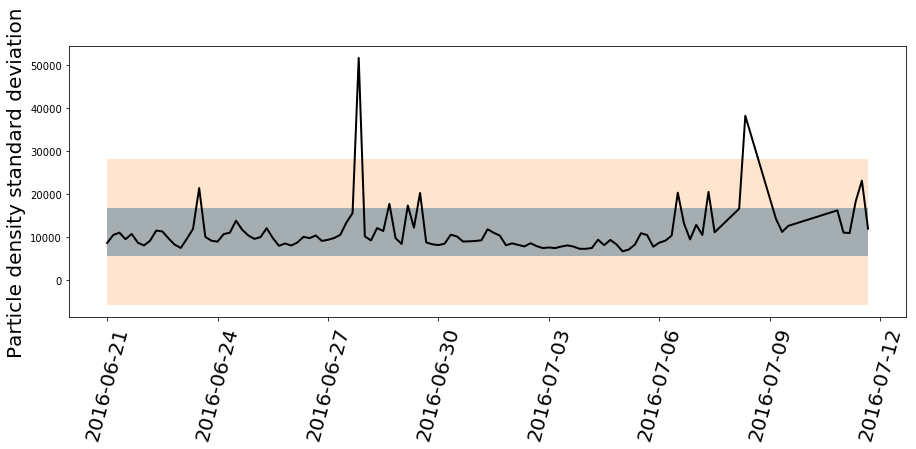

In [20]:
rng = merged3.index
mta_allsum = merged3["particledensitytotal"]

pl.figure(figsize=(15,5))
pl.plot(rng, mta_allsum, 'k-', lw = 2)
pl.xticks(rotation = 75, fontsize=20)
pl.ylabel("Particle density standard deviation", fontsize=20)  
onesig = np.std(mta_allsum)
tsthresh = np.nanmean(mta_allsum)  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(mta_allsum < tsthresh))
print ("outlier date", rng[np.where(mta_allsum < tsthresh)])
pl.fill_between(rng, np.nanmean(mta_allsum) - onesig,
                np.nanmean(mta_allsum) + onesig, alpha=0.5)
pl.fill_between(rng, np.nanmean(mta_allsum) - 3 * onesig,
                 np.nanmean(mta_allsum) + 3 * onesig, alpha = 0.2)
#pl.fill_between(weighted +threesigma(weighted , 10), weighted -threesigma(weighted


# Partice density reading irregularities occured on 6.27 & 7.8.  On these days the sensors returned readings more than three standard deviations away.  

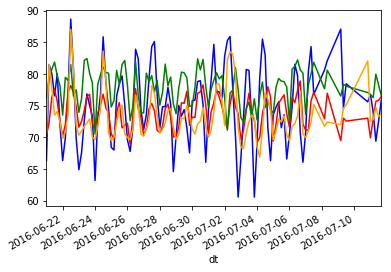

In [21]:
#plot all spl
merged3["spl1"].plot(label="sensor 1", style='blue')
merged3["spl2"].plot(label="sensor 1", style='red')
merged3["spl3"].plot(label="sensor 1", style='green')
merged3["spl4"].plot(label="sensor 1", style='orange')
ax.legend(loc=1)

plt.plot()
plt.show()

3 sigma threshold 265.6
('outlier index', (array([], dtype=int64),))
('outlier date', DatetimeIndex([], dtype='datetime64[ns]', name=u'dt', freq=None))


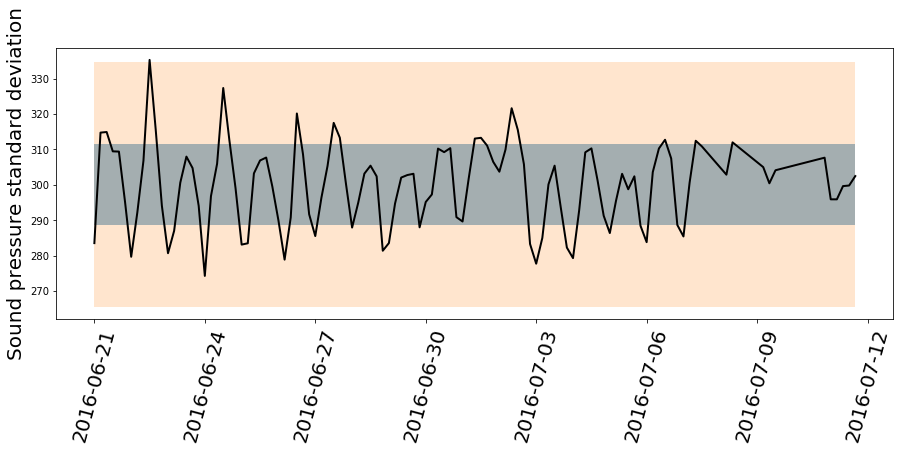

In [22]:
lightindex = merged3.index
mta_allsum = merged3["soundpressuretotal"]

pl.figure(figsize=(15,5))
pl.plot(rng, mta_allsum, 'k-', lw = 2)
pl.xticks(rotation = 75, fontsize=20)
pl.ylabel("Sound pressure standard deviation", fontsize=20)  
onesig = np.std(mta_allsum)
tsthresh = np.nanmean(mta_allsum)  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(mta_allsum < tsthresh))
print ("outlier date", rng[np.where(mta_allsum < tsthresh)])
pl.fill_between(rng, np.nanmean(mta_allsum) - onesig,
                np.nanmean(mta_allsum) + onesig, alpha=0.5)
pl.fill_between(rng, np.nanmean(mta_allsum) - 3 * onesig,
                 np.nanmean(mta_allsum) + 3 * onesig, alpha = 0.2)
#pl.fill_between(weighted +threesigma(weighted , 10), weighted -threesigma(weighted

# It appears that on 6.22 the sound reading was two standard deviations away and much higher.  Also, similar to the light readings, the sound readings were abnormal from 7.9 to 7.11.  

In [23]:
#weather data

html = urlopen("https://www.wunderground.com/history/airport/KJRB/2016/6/21/CustomHistory.html?dayend=17&monthend=7&yearend=2016&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=")

bs = BeautifulSoup(html,"lxml")

weathertable = bs.find("table",{"id":"obsTable"})

# doesn't work so I will just import the csv

weatherdata = pd.read_csv("https://raw.githubusercontent.com/KDumanski/PUI2016_kpd286/master/weatherdata.csv")

I attempted to import the weather data mechanically through the beautiful soup module by importing an xml table and converting it into a pandas dataframe.  I was unable to accomplish this.  

In [24]:
weatherdata["DT"] = pd.to_datetime(weatherdata['DT'])

In [25]:
weatherdata2 = weatherdata.set_index('DT')
weatherdata2.head()

,Temp Avg,Humidity Avg
DT,,
2016-06-21,80,48
2016-06-22,78,40
2016-06-23,74,60
2016-06-24,76,64
2016-06-25,74,64


In [26]:
#get daily averages
merged4 = merged3.groupby([merged3.index.day]).mean()
merged4.head(50)


,lux1,con1,spl1,lux2,con2,spl2,lux3,con3,spl3,lux4,con4,spl4,lighttotal,soundpressuretotal,particledensitytotal
1,15848.208333,2719.527917,78.100100,6890.375000,2271.516667,74.789994,2956.375000,2196.489167,78.412299,16844.083333,2648.767292,74.593321,42539.041667,305.895713,9836.301042
2,16828.458333,2092.650000,77.079778,5289.354167,1993.516042,74.198430,2216.437500,1949.688125,76.701688,13769.937500,1942.562500,78.689737,38104.187500,306.669633,7978.416667
3,14612.104167,2265.565417,72.420709,5027.020833,1710.155833,73.126903,2633.937500,1523.909583,74.141239,16167.125000,2060.306667,71.040274,38440.187500,290.729125,7559.937500
4,6826.500000,2153.868333,75.779426,4125.645833,1902.994167,73.816153,1571.437500,1940.084792,75.463319,7105.979167,2218.081875,72.305030,19629.562500,297.363928,8215.029167
5,17011.808333,2209.447042,72.581693,4179.312500,1613.042500,73.840152,2493.166667,2271.372708,77.748638,15140.875000,2333.117708,71.600942,38825.162500,295.771425,8426.979958
6,11660.375000,2642.387917,73.882722,3010.895833,1917.660000,75.278756,1639.708333,1910.790625,79.546136,7535.333333,5303.462292,72.393008,23846.312500,301.100622,11774.300833
7,24262.906250,3007.444062,78.039024,6426.906250,3498.870313,73.770336,2778.875000,1859.134063,78.404524,17514.531250,5280.260625,72.131082,50983.218750,302.344966,13645.709062
8,23121.535715,2630.952262,81.346856,6495.187500,2204.847500,74.926791,1366.062500,2445.756250,79.113199,9558.250000,20037.188750,72.053186,40541.035715,307.440032,27318.744762
9,8057.291667,3959.484722,80.009268,6479.625000,3268.624583,71.673337,3857.625000,2514.599167,77.628455,20013.083333,2835.850833,73.885610,38407.625000,303.196670,12578.559306
10,11020.875000,2173.723750,75.583625,67.125000,5429.006250,73.009035,52.000000,1393.295000,77.045967,238.000000,7121.718750,82.036768,11378.000000,307.675394,16117.743750


In [27]:

particles = merged4["particledensitytotal"]
temavg = weatherdata2["Temp Avg"]
humavg = weatherdata2["Humidity Avg"]

In [28]:
stats.pearsonr(particles, temavg)

(-0.20146602551849407, 0.38117673258082141)

In [29]:
stats.pearsonr(particles, humavg)

(0.64677807461510395, 0.001531916769541372)

In [30]:
stats.spearmanr(particles, humavg)

SpearmanrResult(correlation=0.53446078999208257, pvalue=0.012560396421246395)

In [31]:
stats.spearmanr(particles, temavg)

SpearmanrResult(correlation=-0.24624351815956264, pvalue=0.28192259762869498)

# The average daily tempature does not have a signifigant coorelation with the average daily particulate density readings.  However, the humidity does have a strong coorelation (.6) and a p value of .0015 with the particulate readings. Therefore I cannot disprove my null hypothesis for tempature but can for humidity.   


In [32]:
#import noise complaint data
noisecomplaintdata = pd.read_csv("https://raw.githubusercontent.com/KDumanski/PUI2016_kpd286/master/311data.csv")

In [33]:
noisecomplaintdata.head()

,Unique Key,Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,number
0,33648024,6/20/2016 22:04,6/20/2016 23:12,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11231,1
1,33654645,6/21/2016 14:14,6/21/2016 15:07,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,11231,1
2,33655882,6/21/2016 13:39,6/29/2016 16:15,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),NaN,11231,1
3,33663657,6/22/2016 8:10,6/22/2016 9:04,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11231,1
4,33668352,6/23/2016 10:40,6/23/2016 12:07,NYPD,New York City Police Department,Noise - Commercial,Car/Truck Horn,Store/Commercial,11231,1


In [34]:
noisecomplaintdata = noisecomplaintdata.set_index('Date')

In [35]:
noisecomplaintdata.index = pd.to_datetime(noisecomplaintdata.index)

In [36]:
#group incidents by date
noisesum = noisecomplaintdata.groupby(lambda x: x.date).sum()

In [37]:
noisesum.head(100)

,Unique Key,Incident Zip,number
2016-06-20,33648024,11231,1
2016-06-21,67310527,22462,2
2016-06-22,33663657,11231,1
2016-06-23,168353116,56155,5
2016-06-24,134714745,44924,4
2016-06-25,572665276,190927,17
2016-06-26,303213917,101079,9
2016-06-27,33704964,11231,1
2016-06-28,168551140,56155,5
2016-06-30,134902268,44924,4


In [38]:
x2 = noisesum["number"]
y2 = merged4["soundpressuretotal"]
y3 = merged3["soundpressuretotal"]

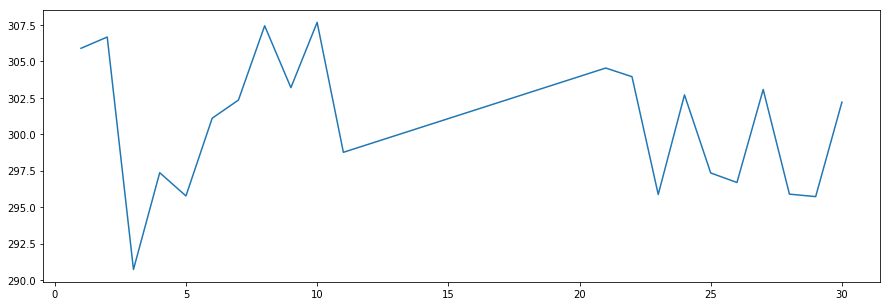

In [39]:
#plot out the complaints per day
pl.figure(figsize=(15,5))
plt.plot(y2)
plt.show()

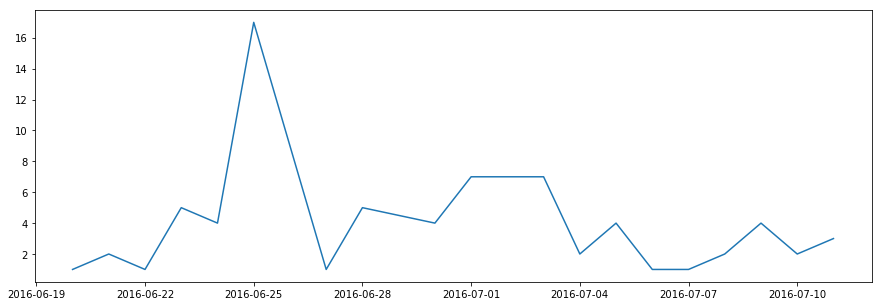

In [40]:
#plot out the complaints per day
pl.figure(figsize=(15,5))
plt.plot(x2)
plt.show()

In [41]:
stats.spearmanr(x2, y2)



SpearmanrResult(correlation=0.13840071634638698, pvalue=0.54964869149338169)

In [42]:
stats.pearsonr(x2, y2)

(0.12905073589666638, 0.57717734370080154)

# The most noise complaints in red hook took place on 6.25 but the highest readings took place on 6.22.  As visualized, there appears to be a relationship between the spike in noise complaints on 6.25.  However, the total noise complaints into the 311 system in red hook is minimal for the majority of the days analyized and therefore we are unable to draw signifigant conclusions using the data. 